<a href="https://colab.research.google.com/github/vishaln94/Digital-Advertising-Analytics/blob/master/Python_Exercise_1_Basic_Ad_analysis_Vishal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import seaborn as sns

Question 0: Finding the CPI and the best/worst days of the week

In [0]:
csvfile = 'drive/My Drive/Colab Notebooks/Travel Pony Facebook.csv'
df = pd.read_csv(csvfile)

In [0]:
CPI = df.loc[:,'Amount Spent (USD)']/df.loc[:,'Impressions']
df['CPI'] = CPI

2. To find day of the week, I converted start date to a date/time object first, and then used the day_name function to get the day of the week for each date. Created a enw column called "Day of Week". 


In [0]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [0]:
df['Day of Week'] = df['Start Date'].dt.day_name()

In [7]:
df.iloc[:,[20,21]].groupby('Day of Week').mean()

,CPI
Day of Week,
Friday,0.004097
Monday,0.002910
Saturday,0.002629
Sunday,0.003688
Thursday,0.003398
Tuesday,0.003040
Wednesday,0.002981


Based on aggreation in the table above, the cheapest day would be on a Saturday, with the mean cost per impression being the lowest. Friday seems to be the most expensive day, with a CPI of around 0.004. 



Question 1 - computing the correlation between amount spent and other variables

In [0]:
df2 = df.iloc[:,[9,4,5,8,10]]

In [9]:
corr = df2.corr()
corr

,Amount Spent (USD),Reach,Frequency,Unique Clicks,Page Likes
Amount Spent (USD),1.000000,0.703124,0.130201,0.882993,0.757612
Reach,0.703124,1.000000,0.334101,0.722249,0.304388
Frequency,0.130201,0.334101,1.000000,0.135103,0.000182
Unique Clicks,0.882993,0.722249,0.135103,1.000000,0.584614
Page Likes,0.757612,0.304388,0.000182,0.584614,1.000000


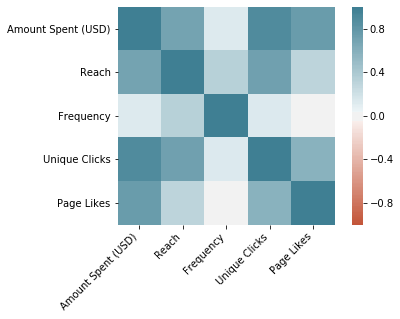

In [10]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Question 2: Simple multiple regression analysis

In [0]:
import statsmodels.api as sm

In [0]:
x = df2.iloc[:,[1,2]]
y = df2['Unique Clicks']

In [15]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Unique Clicks   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              2325.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                        0.00
Time:                        02:19:50   Log-Likelihood:                         -15973.
No. Observations:                3705   AIC:                                  3.195e+04
Df Residuals:                    3703   BIC:                                  3.196e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reach          0.0019   3.12e-05     62.490      0.000       0.002       0.002
Frequency      3.6139      0.298     12.109      0.000       3.029       4.199
==============================================================================
Omnibus:                     5107.616   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5128392.747
Skew:                           7.331   Prob(JB):                         0.00
Kurtosis:                     184.674   Cond. No.                     9.84e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""